In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
import mido
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from pretty_midi import PrettyMIDI
import midi_utils as mu
from midi_frame import MidiFrame
# from midi_live_synthesizer import MidiLiveSynthesizer
import scales

In [2]:
# with open("tmp.mid", "r") as f:
#     m = mido.MidiFile(file=f)
    

In [47]:

MIDI_FOLDER = "MIDI_Files/"

# filename = "KCP_Major_1.mid"
# filename = "Under-The-Sea.mid"
# filename = "Wii Channels - Mii Channel.mid"
# filename = "mii_channel_reexported.mid"
# filename = "test_piano.mid"
# filename = "chpn-p1.mid"
# filename = "HesaPirate.mid"
# filename = "Sonic the Hedgehog - Green Hill Zone.mid"
filename = "toto-africa.mid"
# filename = "vivconct.mid"
# filename = "take_on_me_aha.mid"
# filename = "Never-Gonna-Give-You-Up-3.mid"
# filename = "darude-sandstorm.mid"
m = mido.MidiFile(filename=MIDI_FOLDER + filename)
mf = MidiFrame(m, info_type="dispatched")
print(mf)

current_tick = 0
for x in mido.merge_tracks(m.tracks):
    current_tick += x.time
print(current_tick)

current_time = 0
for x in m:
    current_time += x.time
print(current_time)
    

Info type: dispatched
Filename: MIDI_Files/toto-africa.mid
Midi type: 1
Track count: 30
Music track count: 10
Ticks per beat: 384
Length: 252.67252702087595
Channel 00:
	Message count/channel: 0 (1433)
	Meta Message count: 0
	Used Message types: note_off, note_on, control_change, program_change
	Related Track names: AFRICA  #
Channel 01:
	Message count/channel: 1 (971)
	Meta Message count: 0
	Used Message types: note_off, note_on, control_change, program_change
	Related Track names: 
Channel 02:
	Message count/channel: 2 (253)
	Meta Message count: 0
	Used Message types: pitchwheel, control_change, note_on, program_change, note_off
	Related Track names: 
Channel 03:
	Message count/channel: 3 (1218)
	Meta Message count: 0
	Used Message types: note_off, note_on, control_change, program_change
	Related Track names: vocals
Channel 04:
	Message count/channel: 4 (1021)
	Meta Message count: 0
	Used Message types: note_off, note_on, control_change, program_change
	Related Track names: 
Channel 

None


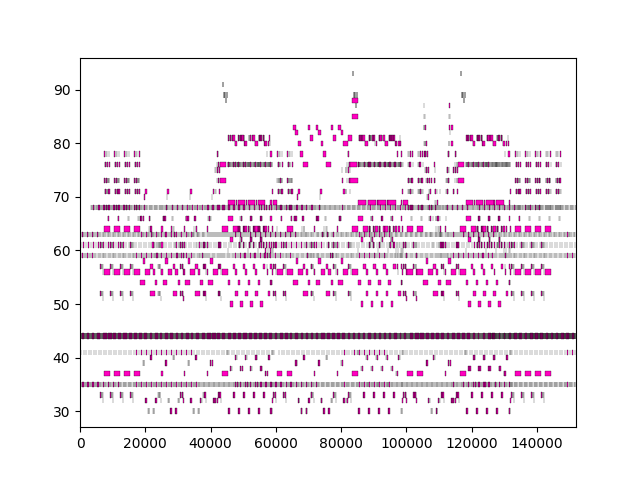

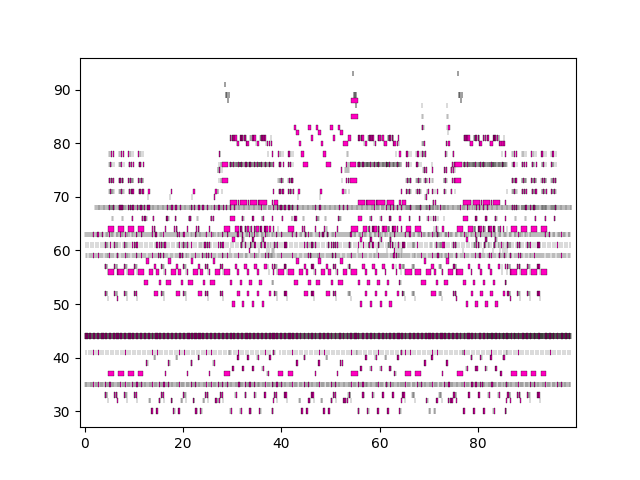

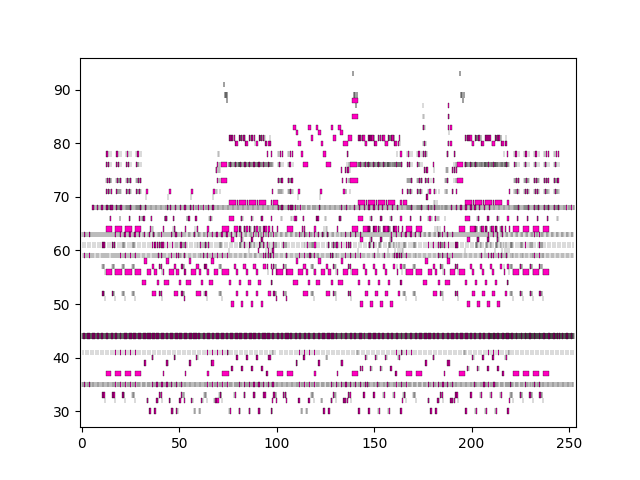

In [48]:
print(mf.playing_track_frame)
mf.make_playing_track_frame([i for i in range(16)])

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="ticks",
              chroma_plot=False)

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="bartime",
              chroma_plot=False)

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="time",
              chroma_plot=False)

In [49]:


suggestions = mf.playing_track_frame.suggest_scale(
    start=0,
    end=100,
    weighted=False,
    normalize_accuracy=True,
    threshold=0.8,
    general_scale_subset=scales.create_general_scale_subset(note_counts=[7])
    # general_scale_subset=[scales.scale(3753),scales.scale(2741)]
    # general_scale_subset=[scales.scale(2741)]
    )

for scale, accuracy in suggestions:
    print(scale, ":", f"{int(accuracy*100)}%")
scale = suggestions[0][0]
for s in scale.rotated_scales():
    print(s, s.chromas_name)



ValueError: too many values to unpack (expected 2)

In [51]:
%timeit -r 4 -n 300 suggestions = mf.playing_track_frame.suggest_scale(start=0, end=100, weighted=False, normalize_accuracy=True, threshold=0.4)

1.62 ms ± 4.12 µs per loop (mean ± std. dev. of 4 runs, 300 loops each)
